In [1]:
# import packages
import mysql.connector
import pandas as pd
import numpy as np
from breakinghits_script import pull_dataframe

In [2]:
# import the MySQLdb and sys modules
import MySQLdb
import sys

In [3]:
# open a database connection
connection = MySQLdb.connect(host='206.225.82.147',
                        user='breaking_read',
                        password='(hHy;gTPMnet',
                        database='breaking_livedb'        
                        )

In [4]:
# prepare a cursor object using cursor() method
myCursor = connection.cursor()

In [5]:
# execute the SQL query using execute() method.
myCursor.execute("show tables")

22

In [6]:
# fetch all of the rows from the query
db_tables = myCursor.fetchall ()

In [7]:
# print the rows
for row in db_tables:
    print(row)

('bh_invited_user',)
('bh_login_activity',)
('bh_messenger',)
('bh_mgenre',)
('bh_music_views',)
('bh_pages_activity',)
('bh_search_activity',)
('bh_shared_activity',)
('bh_social_link_activity',)
('cities',)
('countries',)
('regions',)
('user_activities',)
('user_following',)
('user_music_album',)
('user_music_comments',)
('user_music_votes',)
('user_musics',)
('user_saved',)
('user_saves',)
('user_spotlight',)
('users',)


In [8]:
# close the cursor object
myCursor.close ()

# close the connection
connection.close ()

In [9]:
# Access DB using pd.read_sql
#tables_df = pd.read_sql("SHOW TABLES", connection)
tables_df.head()

,Tables_in_breaking_livedb
0,bh_invited_user
1,bh_login_activity
2,bh_messenger
3,bh_mgenre
4,bh_music_views


In [13]:
tables_df_new = tables_df['Tables_in_breaking_livedb']

In [14]:
# Reading DB tables using pandas read_sql which does not require a cursor
# Now the table names are accessible as a pandas data frame to be parse it out:

select_template = 'SELECT * FROM {table_name}'
frames_dict = {}
for tname in tables_df_new:
    query = select_template.format(table_name = tname)
    frames_dict[tname] = pd.read_sql(query, connection)

In [15]:
frames_dict.keys()

dict_keys(['bh_invited_user', 'bh_login_activity', 'bh_messenger', 'bh_mgenre', 'bh_music_views', 'bh_pages_activity', 'bh_search_activity', 'bh_shared_activity', 'bh_social_link_activity', 'cities', 'countries', 'regions', 'user_activities', 'user_following', 'user_music_album', 'user_music_comments', 'user_music_votes', 'user_musics', 'user_saved', 'user_saves', 'user_spotlight', 'users'])

In [16]:
# The frames_dict dictionary contains all tables in the DB and their data.
frames_dict['user_music_votes'].head()

,id,user_id,user_music_id,date_added,rating
0,405,298,15,2017-09-14 13:19:12,4
1,406,298,16,2017-09-14 13:19:25,4
2,407,298,7,2017-09-14 16:25:09,5
3,408,298,17,2017-09-15 16:25:11,4
4,409,296,7,2017-09-15 16:30:55,5


In [17]:
# Save the dictionary created above containing all dataframes to file for future use.
np.save('frames_dict.npy', frames_dict) 

In [18]:
# Load dictionary from file. No further connection to DB required.
df_all = np.load('frames_dict.npy').item()

## EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [19]:
df_all_01 = df_all.copy()

In [21]:
users_df = df_all_01['users'] 

In [22]:
users_df.head()

,id,email,password,url,artist_website,fname,lname,role,is_artist,birthdayM,...,long,referrer,genre,spotify_url,facebook_url,twitter_url,instagram_url,youtube_url,phone,date_added
0,27,ryanbrahms@breakinghits.com,7af5337e5d0e32b8ac92e9e43b1dc49d,ryanbrahms,www.ryanbrahms.com,Ryan,Brahms,0,1,,...,,,4,,www.facebook.com/ryanbrahmss,www.twitter.com/ryanbrahms,www.instagram.com/ryanbrahms,www.youtube.com/ryanbrahms,,NaT
1,30,admin4,d04fe277447cab828d179d08a9e53932,,,JUDGE4,,0,0,,...,,,,,,,,,,NaT
2,38,bryan@websolutionsmd.com,0192023a7bbd73250516f069df18b500,,,Bryan,sumague,0,0,,...,,,,,,,,,,NaT
3,41,theronqrogers@gmail.com,b5a38f6742dee30defd279b906f6b12e,tharo,djtharo.com,TharO,,0,1,1,...,,,10,,facebook.com/djtharo,@djtharo,@djtharo,,323-790-6160,NaT
4,42,aline@websolutionsmd.com,90330de789e062b04921b6dcbef4bcca,,,Aline,Ferraz,0,0,,...,,,,,,,,,,NaT


In [23]:
# Keep only the variables to be used for prediction. 
users_df = users_df.loc[:,['id', 'fname','lname']] 

In [24]:
ratings_data = df_all_01['user_music_votes']

In [25]:
# Retrieve the ratings from the frames dictionary and drop the id and date columns

ratings_d = ratings_data.drop(['date_added'], axis =1) 
ratings_df = ratings_d.drop(['id'], axis =1)

In [26]:
# Merged users and ratings tables on id.
new_ratings_df = pd.merge(users_df, ratings_d, on='id')

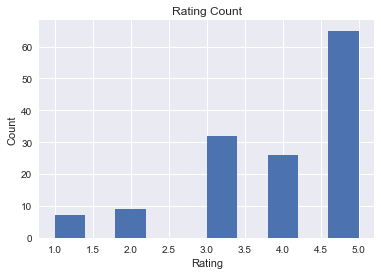

In [27]:
#matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
plt.hist(new_ratings_df['rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Count')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


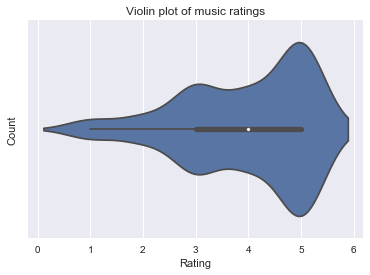

In [28]:
sns.violinplot([new_ratings_df.rating])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Violin plot of music ratings')
plt.show()

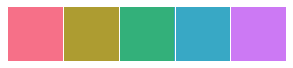

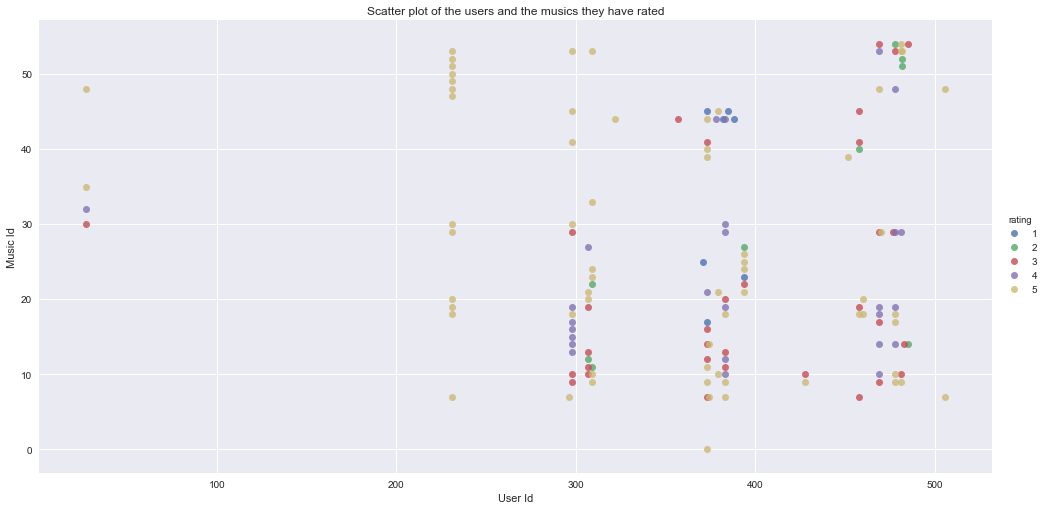

In [30]:
sns.lmplot(x='user_id', y='user_music_id', data=new_ratings_df, hue='rating', fit_reg=False, size=7, aspect=2, \
           palette=sns.palplot(sns.color_palette("husl", 5)))
plt.title('Scatter plot of the users and the musics they have rated')
plt.xlabel('User Id')
plt.ylabel('Music Id')
plt.show()

In [37]:
user_saved_df = df_all_01['user_saved']

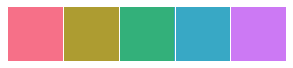

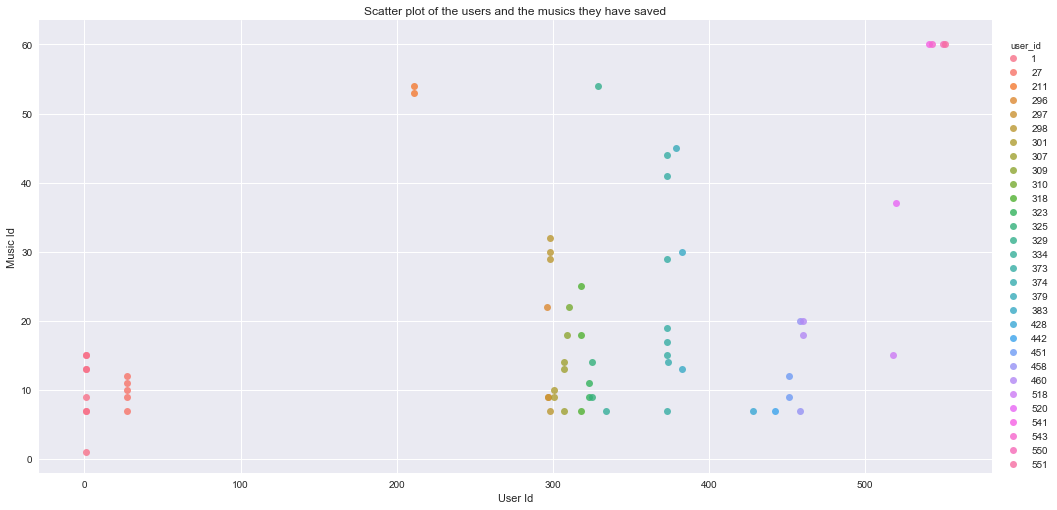

In [35]:
sns.lmplot(x='user_id', y='music_id', data=user_saved_df, hue = 'user_id', fit_reg=False, size=7, aspect=2, \
           palette=sns.palplot(sns.color_palette("husl", 5)))
plt.title('Scatter plot of the users and the musics they have saved')
plt.xlabel('User Id')
plt.ylabel('Music Id')
plt.show()

In [31]:
user_musics_df = df_all_01['user_musics'].iloc[:,0:3]

In [32]:
new_user_musics_df = pd.merge(users_df, user_musics_df, on='id')

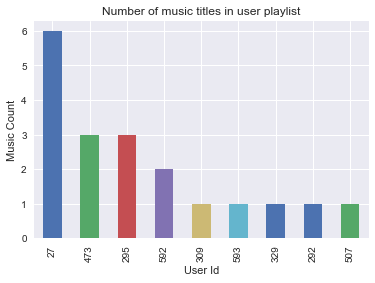

In [33]:
new_user_musics_df['user_id'].value_counts().plot(kind='bar') # user_id
plt.xlabel('User Id')
plt.ylabel('Music Count')
plt.title('Number of music titles in user playlist')
plt.show()

In [44]:
#new_user_musics_df['title'].value_counts().plot(kind='bar')

## Prediction Models

In [45]:
ratings_df.head()

,user_id,user_music_id,rating
0,298,15,4
1,298,16,4
2,298,7,5
3,298,17,4
4,296,7,5


In [46]:
# Import the surprise modules for recommendation
from surprise import Dataset, Reader
from surprise import KNNBasic, KNNWithMeans, KNNBaseline
from surprise import SVD
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse, fcp

from surprise import evaluate, print_perf, prediction_algorithms, Prediction


In [47]:
ratings_df.count()

user_id          369
user_music_id    369
rating           369
dtype: int64

In [48]:
reader = Reader(rating_scale=(1, 5))
# The columns must correspond to user id, item id and ratings.
data = Dataset.load_from_df(ratings_df[['user_id', 'user_music_id', 'rating']], reader)
# build the trainset
trainset = data.build_full_trainset()
# choose the number of folds - 3 chosen.
#data.split(3)
testset = trainset.build_testset() # create the test set

In [49]:
knnb = KNNBasic(sim_options={'user_based': False})
knnw = KNNWithMeans(sim_options={'user_based': False})
knnbas = KNNBaseline(sim_options={'user_based': False})
svd =SVD()
so =SlopeOne()
cc = CoClustering()

In [50]:
svd.train(trainset)
knnb.train(trainset)
knnw.train(trainset)
knnbas.train(trainset)
svd.train(trainset)
so.train(trainset)
cc.train(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [51]:
print('----- KNN Basic -----'); rmse(knnb.test(testset));fcp(knnb.test(testset));
print('----- KNN Means -----'); rmse(knnw.test(testset));fcp(knnw.test(testset));
print('----- KNN Baseline -----'); rmse(knnbas.test(testset));fcp(knnbas.test(testset));
print('----- SVD -----'); rmse(svd.test(testset));fcp(svd.test(testset));
print('----- SVD++ -----'); rmse(so.test(testset));fcp(so.test(testset));
print('----- Co-Clustering -----'); rmse(cc.test(testset));fcp(cc.test(testset));

----- KNN Basic -----
RMSE: 0.5253
FCP:  0.9331
----- KNN Means -----
RMSE: 0.5143
FCP:  0.7777
----- KNN Baseline -----
RMSE: 0.4880
FCP:  0.8384
----- SVD -----
RMSE: 0.7165
FCP:  0.8375
----- SVD++ -----
RMSE: 0.5083
FCP:  0.8774
----- Co-Clustering -----
RMSE: 0.6101
FCP:  0.7326


## Recommendations

In [52]:
# Load the recommendation functions from breakinghits script.
from breakinghits_script import bh_model, bh_predict, bh_top_recs, bh_song_names

In [54]:
# Specify model to be used
svd = bh_model(ratings_df)

RMSE: 0.9186


In [57]:
# Pass in user to create prediction list.
predictions = bh_predict(svd, 319, ratings_df)

In [58]:
# Return top 5 recommendations for the user.
num_pred = bh_top_recs(predictions)
num_pred

,Song_ID,rating
0,18,4.474956
1,7,4.356824
2,48,4.349728
3,9,4.293717
4,53,4.255306


In [59]:
# convert the music ids to the names of the songs.
bh_song_names(num_pred)

,title,rating
0,LOVE DEALER,4.356824
1,Wishing You The Worst,4.293717
2,WHEN I WAS ME,4.474956
3,LOVE DEALER [MUSIC VIDEO],4.349728
4,Love Dealer [TwoDB mix],4.255306
